In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
from datetime import datetime

In [2]:
yf.pdr_override()
y_symbols=['TATAINVEST.NS']
from datetime import datetime
startdate=datetime(2015,1,10)
endate=datetime(2024,2,22)
data=pdr.get_data_yahoo(y_symbols,start=startdate,end=endate)
data.head(10)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-12,558.799988,561.349976,555.849976,557.700012,440.594482,9105
2015-01-13,557.700012,560.450012,554.700012,555.099976,438.540466,18036
2015-01-14,556.049988,559.950012,554.700012,555.200012,438.619415,11760
2015-01-15,556.099976,562.000000,556.099976,559.250000,441.819000,19011
2015-01-16,558.000000,562.000000,557.200012,559.200012,441.779541,9744
2015-01-19,560.799988,563.799988,556.200012,559.150024,441.739990,23635
2015-01-20,560.000000,563.000000,557.250000,561.500000,443.596558,22144
2015-01-21,558.250000,563.000000,555.500000,557.950012,440.791992,17603
2015-01-22,556.400024,583.500000,556.400024,573.049988,452.721313,207696


In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-15,5540.0,5609.000000,5424.049805,5534.899902,5534.899902,61198
2024-02-16,5609.0,5735.000000,5555.000000,5621.750000,5621.750000,92904
2024-02-19,5720.0,5820.000000,5681.549805,5721.500000,5721.500000,96238
2024-02-20,5749.0,5892.950195,5728.299805,5852.000000,5852.000000,77087
2024-02-21,5860.0,6721.000000,5852.000000,6474.700195,6474.700195,767246


In [4]:
data=data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-12,558.799988,561.349976,555.849976,557.700012,440.594482,9105
1,2015-01-13,557.700012,560.450012,554.700012,555.099976,438.540466,18036
2,2015-01-14,556.049988,559.950012,554.700012,555.200012,438.619415,11760
3,2015-01-15,556.099976,562.000000,556.099976,559.250000,441.819000,19011
4,2015-01-16,558.000000,562.000000,557.200012,559.200012,441.779541,9744
...,...,...,...,...,...,...,...
2245,2024-02-15,5540.000000,5609.000000,5424.049805,5534.899902,5534.899902,61198
2246,2024-02-16,5609.000000,5735.000000,5555.000000,5621.750000,5621.750000,92904
2247,2024-02-19,5720.000000,5820.000000,5681.549805,5721.500000,5721.500000,96238
2248,2024-02-20,5749.000000,5892.950195,5728.299805,5852.000000,5852.000000,77087


In [5]:
data=data.drop(['Date','Adj Close'],axis=1)

In [6]:
data

,Open,High,Low,Close,Volume
0,558.799988,561.349976,555.849976,557.700012,9105
1,557.700012,560.450012,554.700012,555.099976,18036
2,556.049988,559.950012,554.700012,555.200012,11760
3,556.099976,562.000000,556.099976,559.250000,19011
4,558.000000,562.000000,557.200012,559.200012,9744
...,...,...,...,...,...
2245,5540.000000,5609.000000,5424.049805,5534.899902,61198
2246,5609.000000,5735.000000,5555.000000,5621.750000,92904
2247,5720.000000,5820.000000,5681.549805,5721.500000,96238
2248,5749.000000,5892.950195,5728.299805,5852.000000,77087


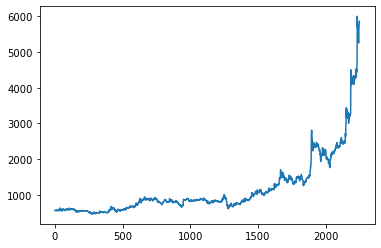

In [7]:
plt.plot(data.Open)

In [8]:
m100=data.Open.rolling(100).mean()
m100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2245    3998.039004
2246    4027.141003
2247    4057.100503
2248    4088.246003
2249    4118.726003
Name: Open, Length: 2250, dtype: float64

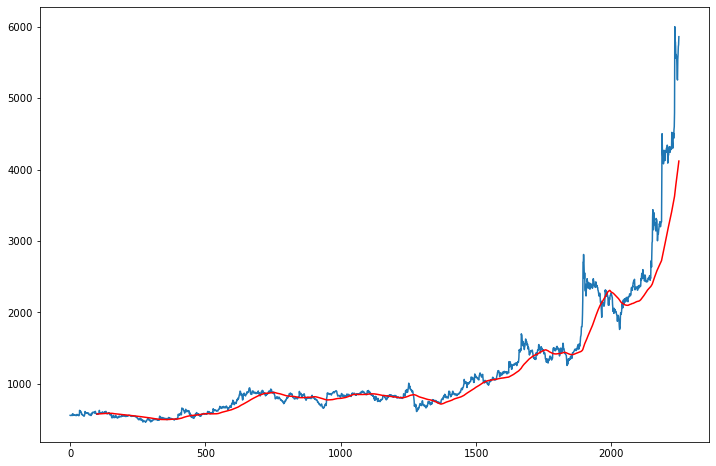

In [9]:
plt.figure(figsize=(12,8))
plt.plot(data.Open)
plt.plot(m100,'r')

In [10]:
m200=data.Open.rolling(200).mean()
m200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2245    3179.524744
2246    3196.919744
2247    3214.794744
2248    3232.590244
2249    3251.165244
Name: Open, Length: 2250, dtype: float64

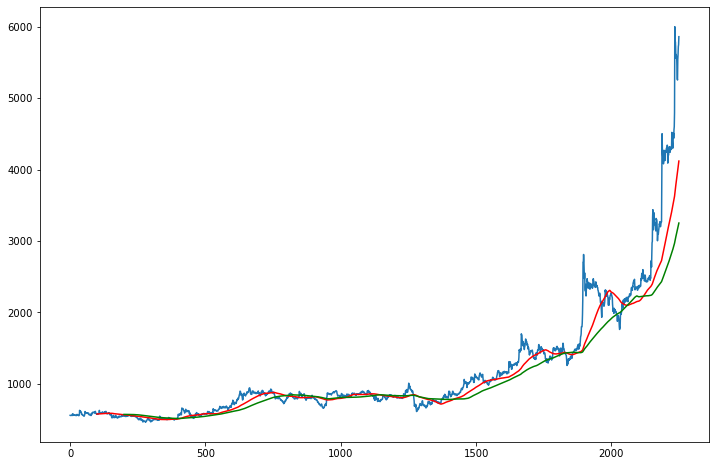

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data.Open)
plt.plot(m100,'r')
plt.plot(m200,'g')

In [12]:
data.shape

(2250, 5)

In [13]:
#splitting data into Training and Testing
data_train=pd.DataFrame(data['Open'][0:int(len(data)*0.70)])
data_test=pd.DataFrame(data['Open'][int(len(data)*0.70):int(len(data))])
print(data_train.shape)
print(data_test.shape)

(1575, 1)
(675, 1)


In [14]:
data_train.head()

,Open
0,558.799988
1,557.700012
2,556.049988
3,556.099976
4,558.000000


In [15]:
data_test.head()

,Open
1575,1065.0
1576,1102.5
1577,1118.0
1578,1130.0
1579,1160.0


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.13648291],
       [0.13487898],
       [0.13247299],
       ...,
       [0.86730825],
       [0.86730825],
       [0.8664334 ]])

In [18]:
data_train_array.shape

(1575, 1)

In [19]:
x_train=[]
y_train=[]

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
x_train.shape

(1475, 100, 1)

In [21]:
#ML model
import tensorflow
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [22]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True,))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
47/47 [==============================] - 15s 195ms/step - loss: 0.0521
Epoch 2/10
47/47 [==============================] - 11s 226ms/step - loss: 0.0133
Epoch 3/10
47/47 [==============================] - 12s 251ms/step - loss: 0.0114
Epoch 4/10
47/47 [==============================] - 12s 245ms/step - loss: 0.0099
Epoch 5/10
47/47 [==============================] - 13s 285ms/step - loss: 0.0088
Epoch 6/10
47/47 [==============================] - 14s 295ms/step - loss: 0.0090
Epoch 7/10
47/47 [==============================] - 15s 309ms/step - loss: 0.0081
Epoch 8/10
47/47 [==============================] - 13s 275ms/step - loss: 0.0074
Epoch 9/10
47/47 [==============================] - 21s 451ms/step - loss: 0.0078
Epoch 10/10
47/47 [==============================] - 14s 293ms/step - loss: 0.0076


In [25]:
model.save('myproject.h5')

In [26]:
data_test.head()

,Open
1575,1065.0
1576,1102.5
1577,1118.0
1578,1130.0
1579,1160.0


In [27]:
past_100_days=data_train.tail(100)

In [28]:
final_data=past_100_days.append(data_test,ignore_index=True)

C:\Users\Sudhanshu Kumar\AppData\Local\Temp\ipykernel_11000\3115774508.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data=past_100_days.append(data_test,ignore_index=True)


In [29]:
final_data.head()

,Open
0,1021.000000
1,1026.800049
2,1024.000000
3,1030.199951
4,1034.000000


In [30]:
input_data=scaler.fit_transform(final_data)
input_data

array([[0.00777202],
       [0.00892787],
       [0.00836987],
       [0.00960541],
       [0.01036269],
       [0.01115982],
       [0.02206057],
       [0.02250896],
       [0.0215026 ],
       [0.02072539],
       [0.01556396],
       [0.02044639],
       [0.02148267],
       [0.0197489 ],
       [0.01773615],
       [0.01414906],
       [0.00737346],
       [0.01295337],
       [0.00901754],
       [0.01992826],
       [0.03108808],
       [0.02730171],
       [0.02354524],
       [0.02654443],
       [0.02442209],
       [0.02365483],
       [0.02071541],
       [0.02096452],
       [0.02052611],
       [0.02149262],
       [0.01972898],
       [0.01913113],
       [0.01603227],
       [0.01576325],
       [0.01553407],
       [0.01454763],
       [0.02329614],
       [0.02770028],
       [0.02928457],
       [0.03347947],
       [0.03367876],
       [0.03053008],
       [0.03028098],
       [0.02650458],
       [0.02535871],
       [0.02231965],
       [0.02650458],
       [0.027

In [31]:
input_data.shape

(775, 1)

In [32]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [33]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [34]:
print(x_test.shape)
print(y_test.shape)

(675, 100, 1)
(675,)


In [35]:
# Making prediction

y_predicted=model.predict(x_test)

22/22 [==============================] - 3s 104ms/step


In [36]:
y_predicted.shape

(675, 1)

In [37]:
y_test

array([0.01654045, 0.02401355, 0.02710243, 0.02949382, 0.0354723 ,
       0.036668  , 0.04025508, 0.0388601 , 0.04045436, 0.03826226,
       0.03447589, 0.03098844, 0.02349542, 0.02851733, 0.03447589,
       0.03029095, 0.02849741, 0.03148665, 0.02997211, 0.02849741,
       0.0296931 , 0.02908528, 0.03567158, 0.03148665, 0.03148665,
       0.03646871, 0.03525309, 0.03397768, 0.03347947, 0.03846154,
       0.03552212, 0.03746513, 0.03726584, 0.03496412, 0.03705659,
       0.03546233, 0.03746513, 0.03567158, 0.03248306, 0.03128737,
       0.03507373, 0.03587086, 0.03496412, 0.03646871, 0.03607015,
       0.03387804, 0.06536469, 0.06536469, 0.05567956, 0.05082703,
       0.05939618, 0.0649761 , 0.05650659, 0.05854923, 0.05665605,
       0.05041849, 0.04404145, 0.04483858, 0.04818654, 0.05540056,
       0.05633718, 0.05637705, 0.0571941 , 0.05579912, 0.05833   ,
       0.05699482, 0.05679554, 0.05598843, 0.05739338, 0.06075129,
       0.05953567, 0.05878836, 0.0609705 , 0.06024313, 0.06233

In [38]:
print(y_predicted)

[[0.06920095]
 [0.06920228]
 [0.06920344]
 [0.06920533]
 [0.06920886]
 [0.06921503]
 [0.06922461]
 [0.06923813]
 [0.06925557]
 [0.06927665]
 [0.06930067]
 [0.06932651]
 [0.06935282]
 [0.06937784]
 [0.06940033]
 [0.06941989]
 [0.06943636]
 [0.06944969]
 [0.06946009]
 [0.06946789]
 [0.06947333]
 [0.06947676]
 [0.0694785 ]
 [0.06947927]
 [0.06947953]
 [0.06947961]
 [0.06948   ]
 [0.06948105]
 [0.06948286]
 [0.06948541]
 [0.06948882]
 [0.06949306]
 [0.06949815]
 [0.06950401]
 [0.06951037]
 [0.06951703]
 [0.06952374]
 [0.06953036]
 [0.06953673]
 [0.06954248]
 [0.06954721]
 [0.06955081]
 [0.06955345]
 [0.06955527]
 [0.06955654]
 [0.0695575 ]
 [0.0695582 ]
 [0.06956093]
 [0.06956827]
 [0.06958129]
 [0.06959957]
 [0.06962272]
 [0.06965065]
 [0.06968237]
 [0.06971666]
 [0.06975214]
 [0.06978694]
 [0.06981889]
 [0.06984631]
 [0.06986833]
 [0.06988534]
 [0.06989828]
 [0.06990833]
 [0.06991659]
 [0.06992385]
 [0.06993085]
 [0.06993803]
 [0.06994555]
 [0.06995348]
 [0.06996173]
 [0.06997053]
 [0.06

In [39]:
scaler.scale_

array([0.00019928])

In [40]:
y_predicte=scaler.inverse_transform(y_predicted)
y_test=y_test.reshape(-1,1)
my_test=scaler.inverse_transform(y_test)

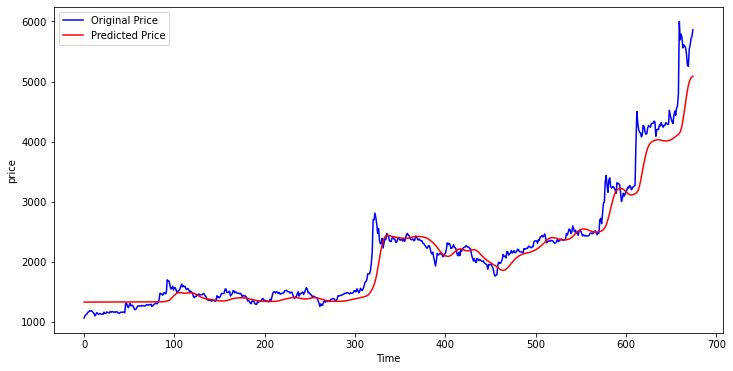

In [41]:
plt.figure(figsize=(12,6))
plt.plot(my_test,'b',label='Original Price')
plt.plot(y_predicte,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [43]:
# the model evalution

from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_predicted))
print("The root mean squared error is {}.".format(rmse))


The root mean squared error is 0.053145342494861116.
